# Set Up

In [2]:
!pip install -q transformers
!pip install -U -q sacremoses

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.3.3 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install accelerate -U

  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/f7/fc/c55e5a2da345c9a24aa2e1e0f60eb2ca290b6a41be82da03a6d4baec4f99/accelerate-0.25.0-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.10.0 from https://files.pythonhosted.org/packages/96/82/0966469ded5946cb4c18dd11b04eac78c943269fc79d290740d6477005e8/torch-2.1.1-cp310-cp310-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.4 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for nvidia-cudnn-cu12==8.9.2.26 from https://files.pythonhosted.org/packages/ff/74/a2e2be7fb83aaedec84f391f082cf765dfb635e7caa9b49065f73e4835d8/nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from tqdm import tqdm

## Create Homophone List

In [5]:
homophones_list = [
    ['accessary', 'accessory'],
    ['ad', 'add'],
    ['ail', 'ale'],
    ['air', 'heir'],
    ['aisle', "I'll", 'isle'],
    ['all', 'awl'],
    ['allowed', 'aloud'],
    ['altar', 'alter'],
    ['arc', 'ark'],
    ['ant', 'aunt'],
    ['ate', 'eight'],
    ['auger', 'augur'],
    ['auk', 'orc'],
    ['aural', 'oral'],
    ['away', 'aweigh'],
    ['aw', 'awe'],
    ['ore', 'oar', 'or'],
    ['axel', 'axle'],
    ['aye', 'eye', 'I'],
    ['bail', 'bale'],
    ['bait', 'bate'],
    ['baize', 'bays'],
    ['bald', 'bawled'],
    ['ball', 'bawl'],
    ['band', 'banned'],
    ['bard', 'barred'],
    ['bare', 'bear'],
    ['bark', 'barque'],
    ['baron', 'barren'],
    ['base', 'bass'],
    ['based', 'baste'],
    ['bazaar', 'bizarre'],
    ['be', 'bee'],
    ['bay', 'bey'],
    ['beach', 'beech'],
    ['bean', 'been'],
    ['beat', 'beet'],
    ['beau', 'bow'],
    ['beer', 'bier'],
    ['bel', 'bell', 'belle'],
    ['berry', 'bury'],
    ['berth', 'birth'],
    ['bight', 'bite', 'byte'],
    ['billed', 'build'],
    ['bitten', 'bittern'],
    ['blew', 'blue'],
    ['bloc', 'block', 'bloque'],
    ['boar', 'bore'],
    ['board', 'bored'],
    ['boarder', 'border'],
    ['bold', 'bowled'],
    ['boos', 'booze'],
    ['born', 'borne'],
    ['bough', 'bow'],
    ['boy', 'buoy'],
    ['brae', 'bray'],
    ['braid', 'brayed'],
    ['braise', 'brays', 'braze'],
    ['brake', 'break'],
    ['bread', 'bred'],
    ['brews', 'bruise'],
    ['bridal', 'bridle'],
    ['broach', 'brooch'],
    ['bur', 'burr', 'brr'],
    ['but', 'butt'],
    ['buy', 'by', 'bye'],
    ['buyer', 'byre'],
    ['calendar', 'calender'],
    ['call', 'caul'],
    ['canvas', 'canvass'],
    ['cast', 'caste'],
    ['caster', 'castor'],
    ['caught', 'court'],
    ['caw', 'core', 'corps'],
    ['cede', 'seed'],
    ['ceiling', 'sealing'],
    ['cell', 'sell'],
    ['censer', 'censor', 'sensor'],
    ['cent', 'scent', 'sent'],
    ['cereal', 'serial'],
    ['cheap', 'cheep'],
    ['check', 'cheque'],
    ['choir', 'quire'],
    ['chord', 'cord'],
    ['cite', 'sight', 'site'],
    ['clack', 'claque'],
    ['clew', 'clue'],
    ['climb', 'clime'],
    ['close', 'cloze'],
    ['coal', 'kohl'],
    ['coarse', 'course'],
    ['coign', 'coin'],
    ['colonel', 'kernel'],
    ['complacent', 'complaisant'],
    ['complement', 'compliment'],
    ['coo', 'coup'],
    ['cops', 'copse'],
    ['council', 'counsel'],
    ['cousin', 'cozen'],
    ['creak', 'creek'],
    ['crews', 'cruise'],
    ['cue', 'kyu', 'queue'],
    ['curb', 'kerb'],
    ['currant', 'current'],
    ['cymbol', 'symbol'],
    ['dam', 'damn'],
    ['days', 'daze'],
    ['dear', 'deer'],
    ['descent', 'dissent'],
    ['desert', 'dessert'],
    ['deviser', 'divisor'],
    ['dew', 'due'],
    ['die', 'dye'],
    ['discreet', 'discrete'],
    ['doe', 'doh', 'dough'],
    ['done', 'dun'],
    ['douse', 'dowse'],
    ['draft', 'draught'],
    ['dual', 'duel'],
    ['earn', 'urn'],
    ['eery', 'eyrie'],
    ['ewe', 'yew', 'you'],
    ['faint', 'feint'],
    ['fah', 'far'],
    ['fair', 'fare'],
    ['fairy', 'ferry'],
    ['fate', 'fete'],
    ['farther', 'father'],
    ['faun', 'fawn'],
    ['faze', 'phase'],
    ['fay', 'fey'],
    ['feat', 'feet'],
    ['ferrule', 'ferule'],
    ['few', 'phew'],
    ['fie', 'phi'],
    ['file', 'phial'],
    ['find', 'fined'],
    ['fir', 'fur'],
    ['fizz', 'phiz'],
    ['flair', 'flare'],
    ['flaw', 'floor'],
    ['flea', 'flee'],
    ['flex', 'flecks'],
    ['flew', 'flu', 'flue'],
    ['floe', 'flow'],
    ['flour', 'flower'],
    ['for', 'fore', 'four'],
    ['foreword', 'forward'],
    ['fort', 'fought'],
    ['forth', 'fourth'],
    ['foul', 'fowl'],
    ['franc', 'frank'],
    ['freeze', 'frieze'],
    ['friar', 'fryer'],
    ['furs', 'furze'],
    ['gait', 'gate'],
    ['galipot', 'gallipot'],
    ['gamble', 'gambol'],
    ['gallop', 'galop'],
    ['gays', 'gaze'],
    ['genes', 'jeans'],
    ['gild', 'guild'],
    ['gilt', 'guilt'],
    ['giro', 'gyro'],
    ['gnaw', 'nor'],
    ['gneiss', 'nice'],
    ['gorilla', 'guerilla'],
    ['grate', 'great'],
    ['greave', 'grieve'],
    ['greys', 'graze'],
    ['grisly', 'grizzly'],
    ['groan', 'grown'],
    ['guessed', 'guest'],
    ['hail', 'hale'],
    ['hair', 'hare'],
    ['hall', 'haul'],
    ['hangar', 'hanger'],
    ['hart', 'heart'],
    ['haw', 'hoar', 'whore'],
    ['hay', 'hey'],
    ['heal', 'heel', "he'll"],
    ['here', 'hear'],
    ['heard', 'herd'],
    ["he'd", 'heed'],
    ['heroin', 'heroine'],
    ['hew', 'hue'],
    ['hi', 'high'],
    ['higher', 'hire'],
    ['him', 'hymn'],
    ['ho', 'hoe'],
    ['hoard', 'horde'],
    ['hoarse', 'horse'],
    ['holey', 'holy', 'wholly'],
    ['hour', 'our'],
    ['idle', 'idol'],
    ['in', 'inn'],
    ['indict', 'indite'],
    ["it's", 'its'],
    ['jewel', 'joule', 'juul'],
    ['key', 'quay'],
    ['knave', 'nave'],
    ['knead', 'need'],
    ['knew', 'new'],
    ['knight', 'night'],
    ['knit', 'nit'],
    ['knob', 'nob'],
    ['knock', 'nock'],
    ['knot', 'not'],
    ['know', 'no'],
    ['knows', 'nose'],
    ['laager', 'lager'],
    ['lac', 'lack'],
    ['lade', 'laid'],
    ['lain', 'lane'],
    ['lam', 'lamb'],
    ['laps', 'lapse'],
    ['larva', 'lava'],
    ['lase', 'laze'],
    ['law', 'lore'],
    ['lay', 'ley'],
    ['lea', 'lee'],
    ['leach', 'leech'],
    ['lead', 'led'],
    ['leak', 'leek'],
    ['lean', 'lien'],
    ['lessen', 'lesson'],
    ['levee', 'levy'],
    ['liar', 'lyre'],
    ['licence', 'license'],
    ['licker', 'liquor'],
    ['lie', 'lye'],
    ['lieu', 'loo'],
    ['links', 'lynx'],
    ['lo', 'low'],
    ['load', 'lode'],
    ['loan', 'lone'],
    ['locks', 'lox'],
    ['loop', 'loupe'],
    ['loot', 'lute'],
    ['made', 'maid'],
    ['mail', 'male'],
    ['main', 'mane'],
    ['maize', 'maze'],
    ['mall', 'maul'],
    ['manna', 'manner'],
    ['mantel', 'mantle'],
    ['mare', 'mayor'],
    ['mark', 'marque'],
    ['marshal', 'martial'],
    ['marten', 'martin'],
    ['mask', 'masque'],
    ['maw', 'more'],
    ['me', 'mi'],
    ['mean', 'mien'],
    ['meat', 'meet', 'mete'],
    ['medal', 'meddle'],
    ['metal', 'mettle'],
    ['meter', 'metre'],
    ['might', 'mite'],
    ['miner', 'minor', 'mynah'],
    ['mind', 'mined'],
    ['missed', 'mist'],
    ['moat', 'mote'],
    ['mode', 'mowed'],
    ['moor', 'more'],
    ['moose', 'mousse'],
    ['morning', 'mourning'],
    ['muscle', 'mussel'],
    ['naval', 'navel'],
    ['nay', 'neigh'],
    ['nigh', 'nye'],
    ['none', 'nun'],
    ['od', 'odd'],
    ['ode', 'owed'],
    ['oh', 'owe'],
    ['one', 'won'],
    ['packed', 'pact'],
    ['packs', 'pax'],
    ['pail', 'pale'],
    ['pain', 'pane'],
    ['pair', 'pare', 'pear'],
    ['palate', 'palette', 'pallet'],
    ['pascal', 'paschal'],
    ['paten', 'patten', 'pattern'],
    ['pause', 'paws', 'pores', 'pours'],
    ['peace', 'piece'],
    ['peak', 'peek', 'pique', 'peke'],
    ['pea', 'pee'],
    ['peal', 'peel'],
    ['pearl', 'purl'],
    ['pedal', 'peddle'],
    ['peer', 'pier'],
    ['pi', 'pie'],
    ['pica', 'pika'],
    ['place', 'plaice'],
    ['plain', 'plane'],
    ['pleas', 'please'],
    ['pole', 'poll'],
    ['plum', 'plumb'],
    ['poof', 'pouffe'],
    ['practice', 'practise'],
    ['praise', 'prays', 'preys'],
    ['principal', 'principle'],
    ['profit', 'prophet'],
    ['quarts', 'quartz'],
    ['quean', 'queen'],
    ['rain', 'reign', 'rein'],
    ['raise', 'rays', 'raze'],
    ['rap', 'wrap'],
    ['raw', 'roar'],
    ['read', 'reed'],
    ['read', 'red'],
    ['real', 'reel'],
    ['reek', 'wreak'],
    ['rest', 'wrest'],
    ['retch', 'wretch'],
    ['review', 'revue'],
    ['rheum', 'room'],
    ['right', 'rite', 'wright', 'write'],
    ['ring', 'wring'],
    ['road', 'rode'],
    ['roe', 'row'],
    ['role', 'roll'],
    ['roo', 'roux', 'rue'],
    ['rood', 'rude'],
    ['root', 'route'],
    ['rose', 'rows'],
    ['rota', 'rotor'],
    ['rote', 'wrote'],
    ['rough', 'ruff'],
    ['rouse', 'rows'],
    ['rung', 'wrung'],
    ['rye', 'wry'],
    ['saver', 'savour'],
    ['scull', 'skull'],
    ['spade', 'spayed'],
    ['sale', 'sail'],
    ['sane', 'seine'],
    ['satire', 'satyr'],
    ['sauce', 'source'],
    ['saw', 'soar', 'sore'],
    ['scene', 'seen'],
    ['sea', 'see'],
    ['seam', 'seem'],
    ['sear', 'seer', 'sere'],
    ['seas', 'sees', 'seize'],
    ['shake', 'sheikh'],
    ['sew', 'so', 'sow'],
    ['shear', 'sheer'],
    ['shoe', 'shoo'],
    ['sic', 'sick'],
    ['side', 'sighed'],
    ['sign', 'sine'],
    ['sink', 'synch'],
    ['slay', 'sleigh'],
    ['sloe', 'slow'],
    ['sole', 'soul'],
    ['some', 'sum'],
    ['son', 'sun'],
    ['sort', 'sought'],
    ['spa', 'spar'],
    ['staid', 'stayed'],
    ['stair', 'stare'],
    ['stake', 'steak'],
    ['stalk', 'stork'],
    ['stationary', 'stationery'],
    ['steal', 'steel'],
    ['stile', 'style'],
    ['storey', 'story'],
    ['straight', 'strait'],
    ['sweet', 'suite'],
    ['swat', 'swot'],
    ['tacks', 'tax'],
    ['tale', 'tail'],
    ['talk', 'torque'],
    ['tare', 'tear'],
    ['taught', 'taut', 'tort'],
    ['te', 'tea', 'tee', 't', 'ti'],
    ['team', 'teem'],
    ['tear', 'tier'],
    ['teas', 'tease'],
    ['terce', 'terse'],
    ['tern', 'turn'],
    ['there', 'their', "they're"],
    ['threw', 'through', 'thru'],
    ['throes', 'throws'],
    ['throne', 'thrown'],
    ['thyme', 'time'],
    ['tic', 'tick'],
    ['tide', 'tied'],
    ['tire', 'tyre'],
    ['to', 'too', 'two'],
    ['toad', 'toed', 'towed'],
    ['told', 'tolled'],
    ['tole', 'toll'],
    ['ton', 'tun'],
    ['tor', 'tore'],
    ['tough', 'tuff'],
    ['troop', 'troupe'],
    ['tuba', 'tuber'],
    ['vain', 'vane', 'vein'],
    ['vale', 'veil'],
    ['vial', 'vile'],
    ['vice', 'vise'],
    ['wade', 'weighed'],
    ['weak', 'week'],
    ['we', 'wee', 'whee'],
    ['way', 'weigh', 'whey'],
    ['wax', 'whacks'],
    ['wart', 'wort'],
    ['watt', 'what'],
    ['warn', 'worn'],
    ['ware', 'wear', 'where'],
    ['war', 'wore'],
    ['wall', 'waul'],
    ['waive', 'wave'],
    ['wait', 'weight'],
    ['wail', 'wale', 'whale'],
    ['wain', 'wane'],
    ["we'd", 'weed'],
    ['weal', "we'll", 'wheel'],
    ['wean', 'ween'],
    ['weather', 'whether'],
    ['weaver', 'weever'],
    ['weir', "we're"],
    ['were', 'whirr'],
    ['wet', 'whet'],
    ['wheald', 'wheeled'],
    ['which', 'witch'],
    ['whig', 'wig'],
    ['while', 'wile'],
    ['whine', 'wine'],
    ['whirl', 'whorl'],
    ['whirled', 'world'],
    ['whit', 'wit'],
    ['white', 'wight'],
    ["who's", 'whose'],
    ['woe', 'whoa'],
    ['wood', 'would'],
    ['yaw', 'yore', 'your', "you're"],
    ['yoke', 'yolk'],
    ["you'll", 'yule']
]

# Creating the Function

In [7]:
%pip install optimum
%pip install onnx onnxruntime
!python3 -m optimum.exporters.onnx --model bert-base-cased --for-ort --task masked-lm models/


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for onnxruntime from https://files.pythonhosted.org/packages/7a/cf/6aa8c56fd63f53c2c485921e411269c7b501a2b4e634bd02f226ab2d5d8e/onnxruntime-1.16.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for flatbuffers from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 36.8 MB/s eta 0:00:0000:01m0:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
The option --for-ort was passed, but its behavior is now the default in the ONNX exporter an

In [9]:
from tqdm import tqdm
from optimum.pipelines import pipeline
fill_mask = pipeline('fill-mask', model='bert-base-uncased', accelerator="ort")

# Function that can check a sentence that has multiple homophones
def homophone_checker(input_string, homophones_list=homophones_list, fill_mask=fill_mask, score_threshold=0):

    # Final output sentence 
    total_sentence = input_string

    # Lowering the input string
    input_string = input_string.lower()
    input_string_list = input_string.split(" ")
    
    # Flatten homophones list
    all_homophones = [
        word for homophone_set in homophones_list for word in homophone_set
    ]

    # Find homophones in input string
    target_homophones = [(word, i) for i, word in enumerate(input_string_list) if list(set([word]).intersection(set(all_homophones)))]
    # print(target_homophones)

    # If there are no homophones in the sentence, return the NA dataframe
    if len(target_homophones) < 1:
        output_df = pd.DataFrame(
            {
                "sentence": input_string,
                "has_homophone": False,
                "is_error": None,
                "error_idx": None,
                "error": None,
                "correct_word": None,
                "correct_sentence": None,
            }, index=[0]
        )
        return output_df

    else:
        final_sentence, is_error, correct_word, error_idx, error = [], [], [], [], []


        for target_homophone_tuple in target_homophones:
            target_homophone = target_homophone_tuple[0]
            target_homophone_idx = target_homophone_tuple[1]

            # Uses the potentially corrected sentence to give the most accurate content possible
            # Unidirectional check
            input_string_list = total_sentence.split(" ")
            
            # Get all homophone options from homophones list
            homophone_options = [homophone for homophone in homophones_list if target_homophone in homophone]

            # Replace homophone with mask token
            input_string_list[target_homophone_idx] = fill_mask.tokenizer.mask_token
            masked_string = ' '.join(input_string_list)
            # print(masked_string)
            
            # Get results
            try:
                results = fill_mask(masked_string, top_k=50)
            except RuntimeError:
                final_sentence.append(input_string)
                is_error.append(False)
                correct_word.append(None)
                error_idx.append(None)
                error.append(None)
                continue

            # Token string dict
            token_string_dict = {}

            # Get top results and their score
            for result in results:
                try:
                    token_string_dict[result["token_str"]] = result["score"]
                except TypeError:
                    # print(result)
                    pass

            # Sort results
            sorted_results = sorted(token_string_dict.items(), key=lambda x: x[1], reverse=True)

            # Find top homophone in results
            homophone_results = [result for result in sorted_results if result[0] in homophone_options[0]]
            # print(homophone_results)
            
            # If the top result is the target homophone, return the original sentence as it is correct
            try:
                top_result = homophone_results[0][0]
            except IndexError:
                final_sentence.append(input_string)
                is_error.append(False)
                correct_word.append(None)
                error_idx.append(None)
                error.append(None)
                continue

            if top_result == target_homophone:
                final_sentence.append(input_string)
                is_error.append(False)
                correct_word.append(None)
                error_idx.append(None)
                error.append(None)

            else:
                # If the top result is not the target homophone, check how many options it found
                # If multiple options:
                if len(homophone_results) > 1:

                    # Check the difference between the top two results
                    score_diff = homophone_results[0][1] - homophone_results[1][1]

                    # If the difference is greater than the threshold, return the top result
                    if score_diff > score_threshold:
                        error_idx.append(input_string.split(" ").index(target_homophone))
                        error.append(target_homophone)
                        final_sentence.append(input_string.replace(target_homophone, homophone_results[0][0]))
                        correct_word.append(homophone_results[0][0])
                        is_error.append(True)

                        total_sentence = total_sentence.replace(target_homophone, homophone_results[0][0])
                
                # If the difference is less than the threshold, return the original sentence
                else:
                    is_error.append(True)
                    error_idx.append(input_string.split(" ").index(target_homophone))
                    final_sentence.append(input_string.replace(target_homophone, homophone_results[0][0]))
                    correct_word.append(homophone_results[0][0])
                    error.append(target_homophone)

                    total_sentence = total_sentence.replace(target_homophone, homophone_results[0][0])

       
        # Create output dataframe that matches our test data
        output_df = pd.DataFrame(
                {
                    "sentence": input_string,
                    "has_homophone": True,
                    "is_error": any(is_error),
                    "error_idx": [[e for e in error_idx if e is not None]],
                    "error": [[e for e in error if e is not None]],
                    "correct_word": [[word for word in correct_word if word is not None]],
                    "correct_sentence": total_sentence,
                }, index=[0]
            )

        # print(total_sentence)
        return output_df

# Testing Bert Uncased

In [10]:
# Test
homophone_checker("I used the drive threw at the restaurant and eight way two much food.")

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,i used the drive threw at the restaurant and e...,True,True,"[4, 11]","[threw, two]","[through, too]",I used the drive through at the restaurant and...


In [41]:
test_df = pd.read_csv("../data/gutenberg-homophone-errors.csv")

test_df = test_df[test_df["sentence"].apply(lambda sentence: len(sentence) <= 512)]

# Creating and Saving Smaller Versions of the Test Data
test_df = test_df.sample(10000).reset_index(drop=True)
test_df.to_csv('../data/test-data-10000.csv', index=False)
test_df.head()

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"o, is this he?the time will not allow the comp...",True,False,NaN,NaN,NaN,"o, is this he?the time will not allow the comp..."
1,"mygood, kind brother!",False,False,NaN,NaN,NaN,"mygood, kind brother!"
2,"he believed in his wifenow and trusted her, bu...",True,True,8.0,butt,but,"he believed in his wifenow and trusted her, bu..."
3,[_they sleep._] enter puck.puck.through the fo...,True,True,16.0,mite,might,[_they sleep._] enter puck.puck.through the fo...
4,he restored heras your stol’n juul and desired...,True,True,5.0,juul,jewel,he restored heras your stol’n jewel and desire...


In [42]:
test_df.shape

(10000, 7)

In [43]:
from tqdm import tqdm

# Pretty display of function progress

for i, sentence in enumerate(tqdm(
    test_df["sentence"],
)):
    if i == 0:
        output_df = homophone_checker(sentence)
    else:
        output_df = pd.concat([output_df, homophone_checker(sentence)])
        
        if i % 1000 == 0:
            output_df.to_csv("../data/gutenberg-10000.csv", index=False)
            print(i)
            
# Save
output_df.to_csv("../data/gutenberg-output-10000.csv", index=False)
output_df.head()

 10%|█         | 1001/10000 [09:15<1:16:57,  1.95it/s]

1000


 20%|██        | 2001/10000 [18:57<1:11:28,  1.87it/s]

2000


 30%|███       | 3001/10000 [27:15<1:02:46,  1.86it/s]

3000


 40%|████      | 4000/10000 [36:41<57:57,  1.73it/s]  

4000


 50%|█████     | 5001/10000 [46:25<22:23,  3.72it/s]  

5000


 60%|██████    | 6001/10000 [56:18<36:56,  1.80it/s]  

6000


 70%|███████   | 7001/10000 [1:06:28<18:19,  2.73it/s]  

7000


 80%|████████  | 8001/10000 [1:15:40<22:54,  1.45it/s]  

8000


 90%|█████████ | 9001/10000 [1:24:50<06:45,  2.46it/s]  

9000


100%|██████████| 10000/10000 [1:35:16<00:00,  1.75it/s]


,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"o, is this he?the time will not allow the comp...",True,False,[],[],[],"o, is this he?the time will not allow the comp..."
0,"mygood, kind brother!",False,None,None,None,None,None
0,"he believed in his wifenow and trusted her, bu...",True,True,[8],[butt],[but],"he believed in his wifenow and trusted her, bu..."
0,[_they sleep._] enter puck.puck.through the fo...,True,True,[16],[mite],[might],[_they sleep._] enter puck.puck.through the fo...
0,he restored heras your stol’n juul and desired...,True,False,[],[],[],he restored heras your stol’n juul and desired...


In [44]:
output_df.to_csv("../data/gutenberg-output-10000.csv", index=False)

## Results

In [ ]:
output_df = pd.read_csv("../data/gutenberg-10000.csv")

In [ ]:
test_df = pd.read_csv("../data/test-data-10000.csv")

In [45]:
output_df

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"o, is this he?the time will not allow the comp...",True,False,[],[],[],"o, is this he?the time will not allow the comp..."
0,"mygood, kind brother!",False,None,None,None,None,None
0,"he believed in his wifenow and trusted her, bu...",True,True,[8],[butt],[but],"he believed in his wifenow and trusted her, bu..."
0,[_they sleep._] enter puck.puck.through the fo...,True,True,[16],[mite],[might],[_they sleep._] enter puck.puck.through the fo...
0,he restored heras your stol’n juul and desired...,True,False,[],[],[],he restored heras your stol’n juul and desired...
...,...,...,...,...,...,...,...
0,and you may be certain that when i have the ho...,True,True,[22],[yaw],[your],and you may be certain that when i have the ho...
0,"miss bennet’s lovely faceconfirmed his views, ...",True,False,[],[],[],"miss bennet’s lovely faceconfirmed his views, ..."
0,"come, what’s the issue?prince.i am now of all ...",True,False,[],[],[],"come, what’s the issue?prince.i am now of all ..."
0,tea at a renaissance villa?,True,False,[],[],[],tea at a renaissance villa?


In [46]:
test_df

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"o, is this he?the time will not allow the comp...",True,False,NaN,NaN,NaN,"o, is this he?the time will not allow the comp..."
1,"mygood, kind brother!",False,False,NaN,NaN,NaN,"mygood, kind brother!"
2,"he believed in his wifenow and trusted her, bu...",True,True,8.0,butt,but,"he believed in his wifenow and trusted her, bu..."
3,[_they sleep._] enter puck.puck.through the fo...,True,True,16.0,mite,might,[_they sleep._] enter puck.puck.through the fo...
4,he restored heras your stol’n juul and desired...,True,True,5.0,juul,jewel,he restored heras your stol’n jewel and desire...
...,...,...,...,...,...,...,...
9995,and you may be certain that when i have the ho...,True,True,22.0,yaw,your,and you may be certain that when i have the ho...
9996,"miss bennet’s lovely faceconfirmed his views, ...",True,False,NaN,NaN,NaN,"miss bennet’s lovely faceconfirmed his views, ..."
9997,"come, what’s the issue?prince.i am now of all ...",True,True,16.0,daze,days,"come, what’s the issue?prince.i am now of all ..."
9998,tea at a renaissance villa?,True,False,NaN,NaN,NaN,tea at a renaissance villa?


In [47]:
import ast
import math

# Cleaning Data
columns_to_fill = ['error_idx']
fill_value = -1

# Fill Unknown locations as -1
output_df[columns_to_fill] = output_df[columns_to_fill].applymap(lambda x: fill_value if (isinstance(x, list) and len(x) == 0) or (isinstance(x, float) and math.isnan(x)) else x)

# Fill NAs
columns_to_fill = ['error', 'correct_word']
fill_value = "No Error"

output_df[columns_to_fill] = output_df[columns_to_fill].applymap(lambda x: fill_value if (isinstance(x, list) and len(x) == 0) or (isinstance(x, float) and math.isnan(x)) else x)

# Retrive list items
columns_to_fill = ['error_idx', 'error', 'correct_word']
output_df[columns_to_fill] = output_df[columns_to_fill].applymap(lambda x: x[0] if (isinstance(x, list) and len(x) != 0) else x)

columns_to_fill = ['is_error', 'has_homophone']
output_df[columns_to_fill] = output_df[columns_to_fill].applymap(lambda x: x if (isinstance(x, bool)) else False)

output_df

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"o, is this he?the time will not allow the comp...",True,False,-1.0,No Error,No Error,"o, is this he?the time will not allow the comp..."
0,"mygood, kind brother!",False,False,NaN,None,None,None
0,"he believed in his wifenow and trusted her, bu...",True,True,8.0,butt,but,"he believed in his wifenow and trusted her, bu..."
0,[_they sleep._] enter puck.puck.through the fo...,True,True,16.0,mite,might,[_they sleep._] enter puck.puck.through the fo...
0,he restored heras your stol’n juul and desired...,True,False,-1.0,No Error,No Error,he restored heras your stol’n juul and desired...
...,...,...,...,...,...,...,...
0,and you may be certain that when i have the ho...,True,True,22.0,yaw,your,and you may be certain that when i have the ho...
0,"miss bennet’s lovely faceconfirmed his views, ...",True,False,-1.0,No Error,No Error,"miss bennet’s lovely faceconfirmed his views, ..."
0,"come, what’s the issue?prince.i am now of all ...",True,False,-1.0,No Error,No Error,"come, what’s the issue?prince.i am now of all ..."
0,tea at a renaissance villa?,True,False,-1.0,No Error,No Error,tea at a renaissance villa?


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("IS ERROR CLASSIFICATION REPORT:")
pd.DataFrame(classification_report(test_df["is_error"], output_df["is_error"], output_dict=True)).transpose()

IS ERROR CLASSIFICATION REPORT:


,precision,recall,f1-score,support
False,0.858508,0.994817,0.921650,4245.0000
True,0.995670,0.879062,0.933739,5755.0000
accuracy,0.928200,0.928200,0.928200,0.9282
macro avg,0.927089,0.936940,0.927695,10000.0000
weighted avg,0.937445,0.928200,0.928607,10000.0000


In [49]:
test_error_idx = [int(x) if isinstance(x, float) and not pd.isna(x) else -1 for x in test_df["error_idx"]]
output_error_idx = [int(x) if isinstance(x, float) and not pd.isna(x) else -1 for x in output_df["error_idx"]]

print("50 MOST COMMON ERROR LOCATIONS: ")
pd.DataFrame(classification_report(test_error_idx, output_error_idx, output_dict=True, zero_division=False)).transpose().sort_values(["support", "f1-score"], ascending=[False, True]).head(50)

50 MOST COMMON ERROR LOCATIONS: 


,precision,recall,f1-score,support
macro avg,0.978191,0.850573,0.903829,10000.0
weighted avg,0.933421,0.924700,0.924423,10000.0
-1,0.858508,0.994817,0.921650,4245.0
2,0.989899,0.901149,0.943442,435.0
1,0.986413,0.852113,0.914358,426.0
0,0.985465,0.889764,0.935172,381.0
3,0.987952,0.870027,0.925247,377.0
5,0.992933,0.854103,0.918301,329.0
4,0.989510,0.873457,0.927869,324.0
6,0.991561,0.917969,0.953347,256.0


In [50]:
test_error = [str(x) if isinstance(x, str) and not pd.isna(x) else "No Error" for x in test_df["error"]]
output_error = [str(x) if isinstance(x, str) and not pd.isna(x) else "No Error" for x in output_df["error"]]

print("50 Most Common Homophone Errors Sorted by Support and F1-Score: ") 
# Sort by support and f1-score
pd.DataFrame(classification_report(test_error, output_error, output_dict=True, zero_division=False)).transpose().sort_values(["support", "f1-score"], ascending=[False, True]).head(50)

50 Most Common Homophone Errors Sorted by Support and F1-Score: 


,precision,recall,f1-score,support
macro avg,0.720605,0.589806,0.633176,10000.0
weighted avg,0.918075,0.925500,0.914452,10000.0
No Error,0.858508,0.994817,0.921650,4245.0
butt,1.000000,0.950920,0.974843,163.0
bee,1.000000,0.963190,0.981250,163.0
inn,0.993671,0.981250,0.987421,160.0
knot,1.000000,0.966887,0.983165,151.0
mi,1.000000,0.963504,0.981413,137.0
watt,1.000000,0.992248,0.996109,129.0
wood,1.000000,0.950000,0.974359,120.0


In [51]:
test_correct_word = [str(x) if isinstance(x, str) and not pd.isna(x) else "No Error" for x in test_df["correct_word"]]
output_correct_word = [str(x) if isinstance(x, str) and not pd.isna(x) else "No Error" for x in output_df["correct_word"]]

print("50 Most Common Correct Words: ")
correct_words = (
    pd.DataFrame(
        classification_report(test_correct_word, output_correct_word, output_dict=True, zero_division=False)
    )
    .transpose()
    .sort_values(["support", "f1-score"], ascending=False)
)

correct_words.head(50)


50 Most Common Correct Words: 


,precision,recall,f1-score,support
weighted avg,0.917452,0.924800,0.913737,10000.0
macro avg,0.705319,0.565531,0.612339,10000.0
No Error,0.858508,0.994817,0.921650,4245.0
be,1.000000,0.963190,0.981250,163.0
but,1.000000,0.950920,0.974843,163.0
in,0.993671,0.981250,0.987421,160.0
for,0.987342,0.975000,0.981132,160.0
to,0.923529,0.993671,0.957317,158.0
not,1.000000,0.966887,0.983165,151.0
me,1.000000,0.963504,0.981413,137.0


In [52]:
print("CORRECT WORDS WITH UNDER 0.9 F1-SCORE: ")
correct_words[correct_words["f1-score"] < 0.9].head(60)

CORRECT WORDS WITH UNDER 0.9 F1-SCORE: 


,precision,recall,f1-score,support
macro avg,0.705319,0.565531,0.612339,10000.0
great,1.000000,0.775862,0.873786,58.0
too,0.850000,0.927273,0.886957,55.0
two,0.846154,0.868421,0.857143,38.0
scene,1.000000,0.631579,0.774194,38.0
mind,1.000000,0.812500,0.896552,32.0
its,0.735294,0.961538,0.833333,26.0
sweet,1.000000,0.653846,0.790698,26.0
fair,1.000000,0.565217,0.722222,23.0
world,1.000000,0.772727,0.871795,22.0


## Confusion Matrices

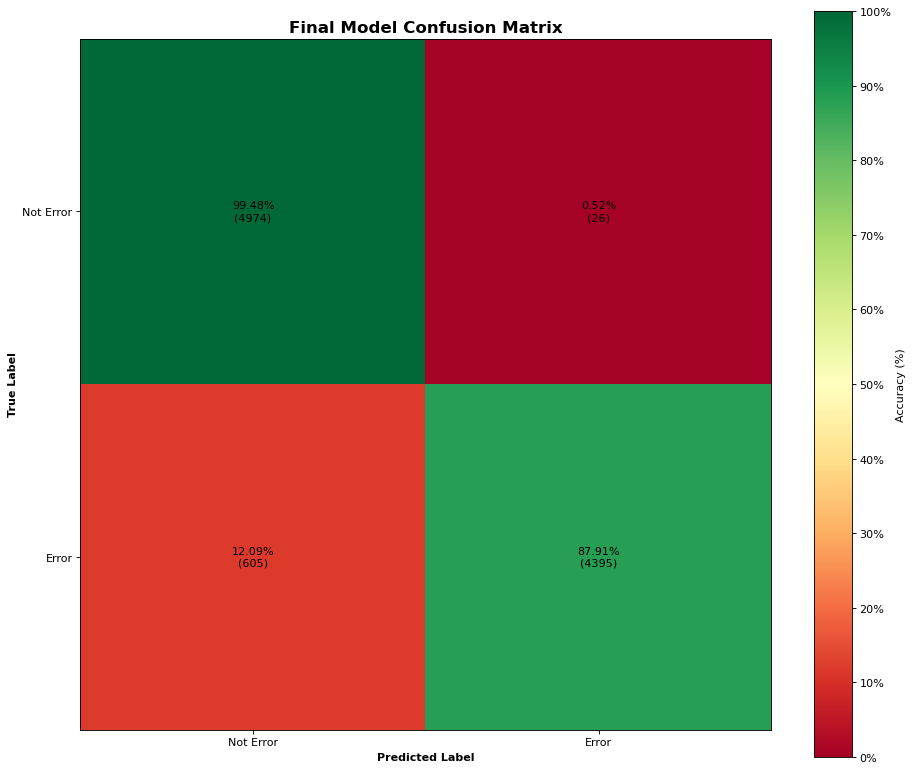

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_df["is_error"], output_df["is_error"], normalize="true")

plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar(label="Accuracy (%)") 

# Dict of 0 to 1 values as a %
cbar_ticks = {i: f"{i*100:.0f}%" for i in np.linspace(0, 1, 11)}

# Set ticks and tick labels
cbar.set_ticks(list(cbar_ticks.keys()))
cbar.set_ticklabels(list(cbar_ticks.values()))

# Add labels and title
classes = ['Not Error', 'Error']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.title('Final Model Confusion Matrix', fontsize=15, fontweight='bold')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix[i, j]:.2%}\n({conf_matrix[i, j] * (len(test_df)/2):.0f})",
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


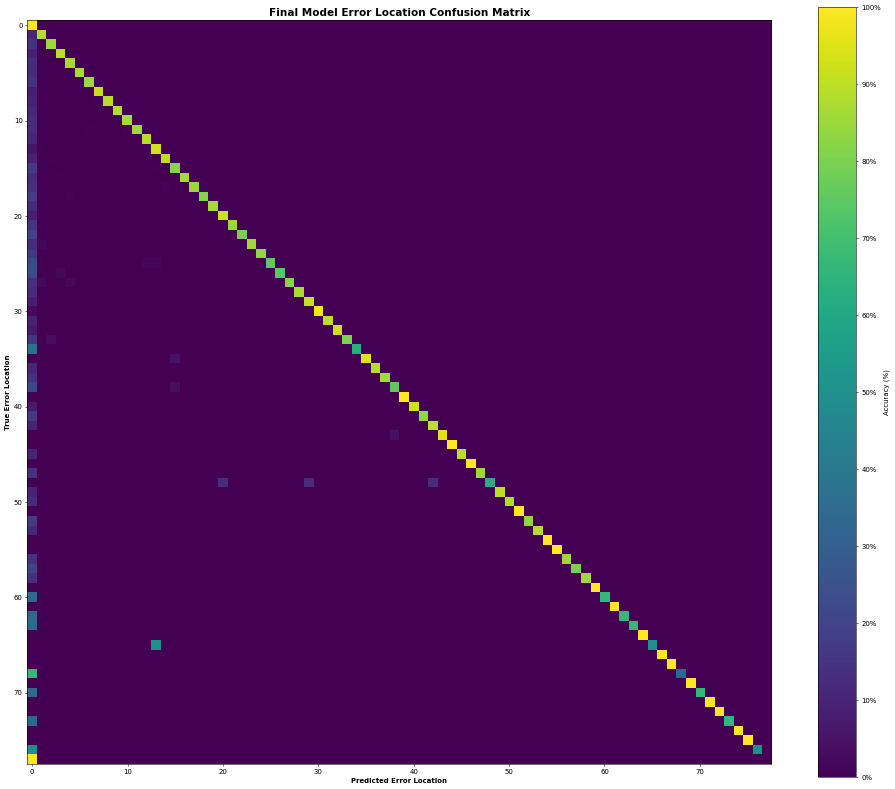

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_error_idx, output_error_idx, normalize="true")

ticks = ["No Error" if i==0 else str(i) for i in output_error_idx]
plt.figure(figsize=(24, 20), dpi=50)
plt.imshow(conf_matrix, cmap="viridis", vmin=0, vmax=1)
# Add colorbar
cbar = plt.colorbar(label="Accuracy (%)") 

# Dict of 0 to 1 values as a %
cbar_ticks = {i: f"{i*100:.0f}%" for i in np.linspace(0, 1, 11)}

# Set ticks and tick labels
cbar.set_ticks(list(cbar_ticks.keys()))
cbar.set_ticklabels(list(cbar_ticks.values()))
plt.ylabel('True Error Location', fontweight='bold')
plt.xlabel('Predicted Error Location', fontweight='bold')
plt.title('Final Model Error Location Confusion Matrix', fontsize=15, fontweight='bold')

plt.show()

# XLM-MLM-EN-2048

In [10]:
test_df = pd.read_csv("../data/gutenberg-homophone-errors.csv")
test_df = test_df.sample(250).reset_index(drop=True)
test_df.head()

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"ewe are a good archer, marcus.",True,True,0.0,ewe,you,"you are a good archer, marcus."
1,"""my dearest girl, what is the matter?""",True,False,NaN,NaN,NaN,"""my dearest girl, what is the matter?"""
2,"the gods give him joy, and make him goodfriend...",True,False,NaN,NaN,NaN,"the gods give him joy, and make him goodfriend..."
3,think of it.the very place puts toys of desper...,True,True,33.0,knot,not,think of it.the very place puts toys of desper...
4,i don’t know whether you have given muchstudy ...,True,False,NaN,NaN,NaN,i don’t know whether you have given muchstudy ...


In [13]:
model="xlm-mlm-en-2048"
fill_mask = pipeline('fill-mask', model=model)
for i, sentence in enumerate(tqdm(test_df["sentence"])):
    if i == 0:
        output_df = homophone_checker(sentence, fill_mask=fill_mask)
    else:
        output_df = pd.concat([output_df, homophone_checker(sentence, fill_mask=fill_mask)])

output_df.reset_index(inplace=True, drop=True)
output_df.to_csv("../data/gutenberg-xlm-mlm-en-2048.csv")
output_df.head()

100%|██████████| 250/250 [14:02:26<00:00, 202.19s/it]    


,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,"ewe are a good archer, marcus.",True,False,[],[],[],"ewe are a good archer, marcus."
1,"""my dearest girl, what is the matter?""",True,False,[],[],[],"""my dearest girl, what is the matter?"""
2,"the gods give him joy, and make him goodfriend...",True,False,[],[],[],"the gods give him joy, and make him goodfriend..."
3,think of it.the very place puts toys of desper...,True,False,[],[],[],think of it.the very place puts toys of desper...
4,i don’t know whether you have given muchstudy ...,True,False,[],[],[],i don’t know whether you have given muchstudy ...


Model is super slow!

## Results

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("IS ERROR CLASSIFICATION REPORT:")
pd.DataFrame(classification_report(test_df["is_error"], output_df["is_error"], output_dict=True)).transpose()

IS ERROR CLASSIFICATION REPORT:


,precision,recall,f1-score,support
False,0.745455,0.931818,0.828283,176.000
True,0.600000,0.243243,0.346154,74.000
accuracy,0.728000,0.728000,0.728000,0.728
macro avg,0.672727,0.587531,0.587218,250.000
weighted avg,0.702400,0.728000,0.685573,250.000


In [15]:
test_error_idx = [i if str(i) != str(np.nan) else -1 for i in test_df["error_idx"]]
output_error_idx = [i[0] if len(i)==1 else -1 for i in output_df["error_idx"]]
print("ERROR LOCATION REPORT: ")
pd.DataFrame(classification_report(test_error_idx, output_error_idx, output_dict=True)).transpose()

ERROR LOCATION REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
-1.0,0.739910,0.937500,0.827068,176.000
0.0,0.000000,0.000000,0.000000,2.000
1.0,0.000000,0.000000,0.000000,4.000
2.0,0.666667,0.250000,0.363636,8.000
3.0,0.000000,0.000000,0.000000,2.000
4.0,0.000000,0.000000,0.000000,2.000
5.0,0.800000,0.500000,0.615385,8.000
6.0,0.500000,0.200000,0.285714,5.000
7.0,0.500000,0.333333,0.400000,3.000
8.0,0.000000,0.000000,0.000000,4.000


In [16]:
test_error = [i if str(i) != str(np.nan) else -1 for i in test_df["error"]]
output_error = [i[0] if len(i)==1 else -1 for i in output_df["error"]]
print("ERROR REPORT: ") 
pd.DataFrame(classification_report(test_error, output_error, output_dict=True)).transpose()

ERROR REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
-1,0.739910,0.937500,0.827068,176.000
bean,0.000000,0.000000,0.000000,1.000
bee,1.000000,0.500000,0.666667,2.000
berth,0.000000,0.000000,0.000000,1.000
butt,0.000000,0.000000,0.000000,1.000
buy,0.000000,0.000000,0.000000,2.000
caught,0.000000,0.000000,0.000000,1.000
ewe,0.000000,0.000000,0.000000,2.000
fore,0.000000,0.000000,0.000000,2.000
four,1.000000,1.000000,1.000000,1.000


In [17]:
test_correct_word = [i if str(i) != str(np.nan) else -1 for i in test_df["correct_word"]]
output_correct_word = [i[0] if len(i)==1 else -1 for i in output_df["correct_word"]]
print("CORRECT WORD REPORT: ")
pd.DataFrame(classification_report(test_correct_word, output_correct_word, output_dict=True)).transpose().sort_values("support", ascending=False)

CORRECT WORD REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
weighted avg,0.621367,0.712000,0.639648,250.000
macro avg,0.147191,0.083929,0.093129,250.000
-1,0.739910,0.937500,0.827068,176.000
in,1.000000,0.300000,0.461538,10.000
to,0.411765,0.700000,0.518519,10.000
you,1.000000,0.166667,0.285714,6.000
not,0.000000,0.000000,0.000000,4.000
your,0.000000,0.000000,0.000000,4.000
no,0.000000,0.000000,0.000000,3.000
for,1.000000,0.333333,0.500000,3.000


### Confusion Matrices

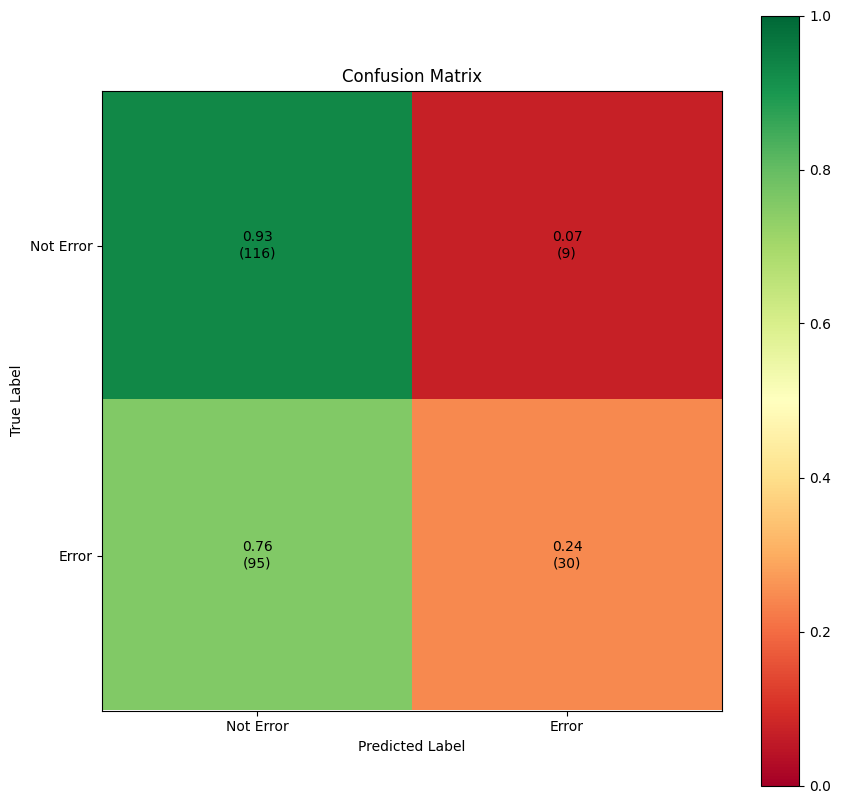

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_df["is_error"], output_df["is_error"], normalize="true")

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()

# Add labels and title
classes = ['Not Error', 'Error']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix[i, j]:.2f}\n({conf_matrix[i, j] * (len(test_df)/2):.0f})",
                 ha='center', va='center', color='black', fontsize=10)

plt.show()


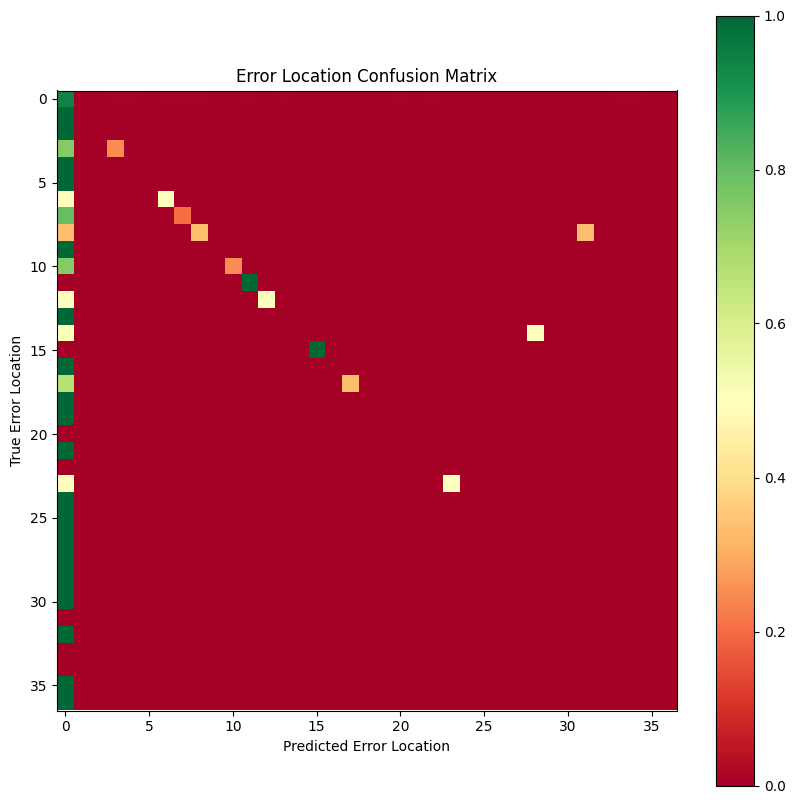

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_error_idx, output_error_idx, normalize="true")

ticks = ["No Error" if i==0 else str(i) for i in output_error_idx]
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()
plt.ylabel('True Error Location')
plt.xlabel('Predicted Error Location')
plt.title('Error Location Confusion Matrix')

plt.show()

# Roberta Base

In [20]:
test_df = pd.read_csv("../data/gutenberg-homophone-errors.csv")
test_df = test_df.sample(500).reset_index(drop=True)
test_df.head()

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,he surely affected herfor her wit.moth.it was ...,True,True,19.0,wight,white,he surely affected herfor her wit.moth.it was ...
1,"o heavens!coriolanus.nay, i prithee, woman—vol...",True,False,NaN,NaN,NaN,"o heavens!coriolanus.nay, i prithee, woman—vol..."
2,"he hasbargained to drive us, and he is doing it.",True,False,NaN,NaN,NaN,"he hasbargained to drive us, and he is doing it."
3,i shouldn’t mind anything if she would have me.,True,False,NaN,NaN,NaN,i shouldn’t mind anything if she would have me.
4,hereby the casks are soughtto be kept damply t...,True,False,NaN,NaN,NaN,hereby the casks are soughtto be kept damply t...


In [24]:
model="roberta-base"
fill_mask = pipeline('fill-mask', model=model)
for i, sentence in enumerate(tqdm(test_df["sentence"])):
    if i == 0:
        output_df = homophone_checker(sentence, fill_mask=fill_mask)
    else:
        output_df = pd.concat([output_df, homophone_checker(sentence, fill_mask=fill_mask)])

output_df.reset_index(inplace=True, drop=True)
output_df.to_csv("../data/gutenberg-roberta-base.csv")
output_df.head()

100%|██████████| 500/500 [16:20<00:00,  1.96s/it]


,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,he surely affected herfor her wit.moth.it was ...,True,False,[],[],[],he surely affected herfor her wit.moth.it was ...
1,"o heavens!coriolanus.nay, i prithee, woman—vol...",True,False,[],[],[],"o heavens!coriolanus.nay, i prithee, woman—vol..."
2,"he hasbargained to drive us, and he is doing it.",True,False,[],[],[],"he hasbargained to drive us, and he is doing it."
3,i shouldn’t mind anything if she would have me.,True,False,[],[],[],i shouldn’t mind anything if she would have me.
4,hereby the casks are soughtto be kept damply t...,True,False,[],[],[],hereby the casks are soughtto be kept damply t...


## Results

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("IS ERROR CLASSIFICATION REPORT:")
pd.DataFrame(classification_report(test_df["is_error"], output_df["is_error"], output_dict=True)).transpose()

IS ERROR CLASSIFICATION REPORT:


,precision,recall,f1-score,support
False,0.781106,0.994135,0.874839,341.000
True,0.969697,0.402516,0.568889,159.000
accuracy,0.806000,0.806000,0.806000,0.806
macro avg,0.875401,0.698325,0.721864,500.000
weighted avg,0.841078,0.806000,0.777547,500.000


In [26]:
test_error_idx = [i if str(i) != str(np.nan) else -1 for i in test_df["error_idx"]]
output_error_idx = [i[0] if len(i)==1 else -1 for i in output_df["error_idx"]]
print("ERROR LOCATION REPORT: ")
pd.DataFrame(classification_report(test_error_idx, output_error_idx, output_dict=True)).transpose()

ERROR LOCATION REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
-1.0,0.781106,0.994135,0.874839,341.000
0.0,1.000000,0.666667,0.800000,3.000
1.0,1.000000,0.300000,0.461538,10.000
2.0,1.000000,0.090909,0.166667,11.000
3.0,1.000000,0.555556,0.714286,9.000
4.0,1.000000,0.250000,0.400000,8.000
5.0,1.000000,0.428571,0.600000,14.000
6.0,1.000000,0.571429,0.727273,7.000
7.0,1.000000,0.181818,0.307692,11.000
8.0,1.000000,0.833333,0.909091,6.000


In [27]:
test_error = [i if str(i) != str(np.nan) else -1 for i in test_df["error"]]
output_error = [i[0] if len(i)==1 else -1 for i in output_df["error"]]
print("ERROR REPORT: ") 
pd.DataFrame(classification_report(test_error, output_error, output_dict=True)).transpose()

ERROR REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
-1,0.781106,0.994135,0.874839,341.000
ate,0.000000,0.000000,0.000000,1.000
aweigh,1.000000,0.500000,0.666667,2.000
awl,1.000000,1.000000,1.000000,1.000
bean,1.000000,0.500000,0.666667,2.000
...,...,...,...,...
yew,1.000000,0.571429,0.727273,7.000
you're,1.000000,0.500000,0.666667,2.000
accuracy,0.806000,0.806000,0.806000,0.806
macro avg,0.424043,0.289254,0.332310,500.000


In [28]:
test_correct_word = [i if str(i) != str(np.nan) else -1 for i in test_df["correct_word"]]
output_correct_word = [i[0] if len(i)==1 else -1 for i in output_df["correct_word"]]
print("CORRECT WORD REPORT: ")
pd.DataFrame(classification_report(test_correct_word, output_correct_word, output_dict=True)).transpose().sort_values("support", ascending=False)

CORRECT WORD REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
weighted avg,0.749914,0.806000,0.754995,500.000
macro avg,0.408940,0.285855,0.325060,500.000
-1,0.781106,0.994135,0.874839,341.000
to,1.000000,0.615385,0.761905,26.000
in,1.000000,0.461538,0.631579,13.000
...,...,...,...,...
rose,0.000000,0.000000,0.000000,1.000
high,0.000000,0.000000,0.000000,1.000
nor,1.000000,1.000000,1.000000,1.000
accuracy,0.806000,0.806000,0.806000,0.806


### Confusion Matrices

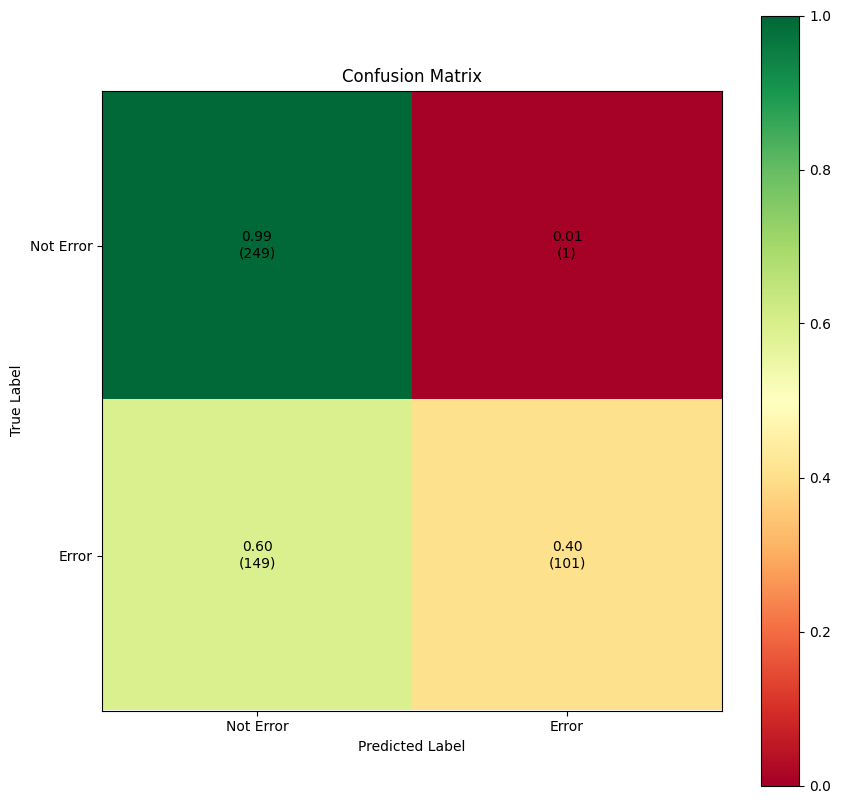

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_df["is_error"], output_df["is_error"], normalize="true")

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()

# Add labels and title
classes = ['Not Error', 'Error']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix[i, j]:.2f}\n({conf_matrix[i, j] * (len(test_df)/2):.0f})",
                 ha='center', va='center', color='black', fontsize=10)

plt.show()


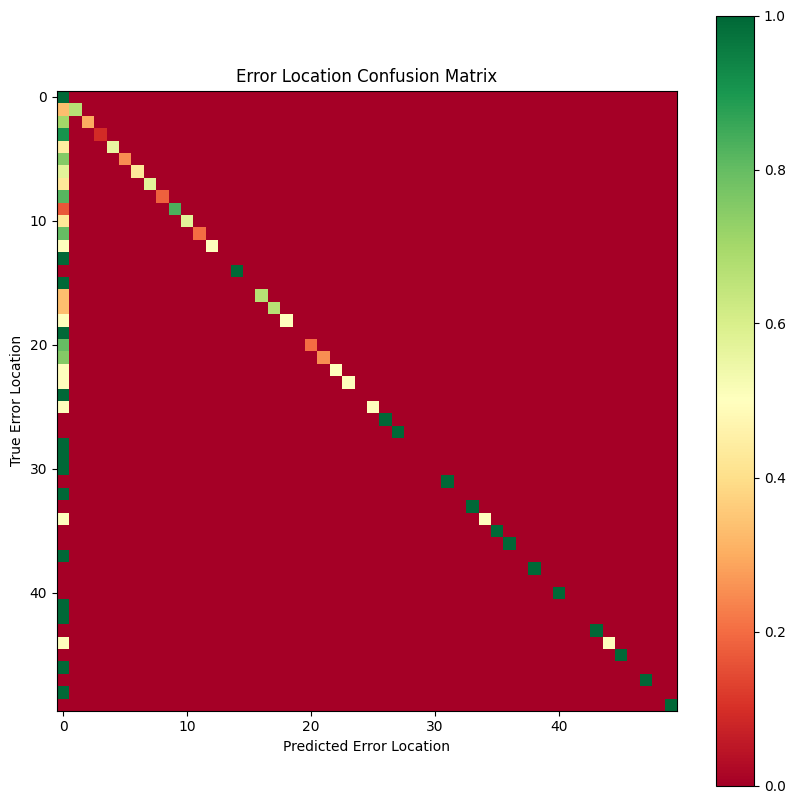

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_error_idx, output_error_idx, normalize="true")

ticks = ["No Error" if i==0 else str(i) for i in output_error_idx]
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()
plt.ylabel('True Error Location')
plt.xlabel('Predicted Error Location')
plt.title('Error Location Confusion Matrix')

plt.show()

# Albert-base-v2

In [31]:
test_df = pd.read_csv("../data/gutenberg-homophone-errors.csv")
test_df = test_df.sample(500).reset_index(drop=True)
test_df.head()

,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,hehad set out on his work with awl his old ani...,True,True,7.0,awl,all,hehad set out on his work with all his old ani...
1,"amy wassketching a group of ferns, and jo was ...",True,False,NaN,NaN,NaN,"amy wassketching a group of ferns, and jo was ..."
2,i will none but hector.,True,False,NaN,NaN,NaN,i will none but hector.
3,"he grew unto his seat,and to such wondrous doi...",True,False,NaN,NaN,NaN,"he grew unto his seat,and to such wondrous doi..."
4,but the chowder; clam or cod to-morrowfor brea...,True,False,NaN,NaN,NaN,but the chowder; clam or cod to-morrowfor brea...


In [33]:
model="albert-base-v2"
fill_mask = pipeline('fill-mask', model=model)
for i, sentence in enumerate(tqdm(test_df["sentence"])):
    if i == 0:
        output_df = homophone_checker(sentence, fill_mask=fill_mask)
    else:
        output_df = pd.concat([output_df, homophone_checker(sentence, fill_mask=fill_mask)])

output_df.reset_index(inplace=True, drop=True)
output_df.to_csv("../data/gutenberg-albert-base-v2.csv")
output_df.head()

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForMaskedLM: ['albert.pooler.weight', 'albert.pooler.bias']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 500/500 [11:52<00:00,  1.42s/it]


,sentence,has_homophone,is_error,error_idx,error,correct_word,correct_sentence
0,hehad set out on his work with awl his old ani...,True,True,[7],[awl],[all],hehad set out on his work with all his old ani...
1,"amy wassketching a group of ferns, and jo was ...",True,False,[],[],[],"amy wassketching a group of ferns, and jo was ..."
2,i will none but hector.,True,False,[],[],[],i will none but hector.
3,"he grew unto his seat,and to such wondrous doi...",True,False,[],[],[],"he grew unto his seat,and to such wondrous doi..."
4,but the chowder; clam or cod to-morrowfor brea...,True,False,[],[],[],but the chowder; clam or cod to-morrowfor brea...


## Results

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("IS ERROR CLASSIFICATION REPORT:")
pd.DataFrame(classification_report(test_df["is_error"], output_df["is_error"], output_dict=True)).transpose()

IS ERROR CLASSIFICATION REPORT:


,precision,recall,f1-score,support
False,0.888312,0.994186,0.938272,344.00
True,0.982609,0.724359,0.833948,156.00
accuracy,0.910000,0.910000,0.910000,0.91
macro avg,0.935460,0.859273,0.886110,500.00
weighted avg,0.917732,0.910000,0.905723,500.00


In [35]:
test_error_idx = [i if str(i) != str(np.nan) else -1 for i in test_df["error_idx"]]
output_error_idx = [i[0] if len(i)==1 else -1 for i in output_df["error_idx"]]
print("ERROR LOCATION REPORT: ")
pd.DataFrame(classification_report(test_error_idx, output_error_idx, output_dict=True)).transpose()

ERROR LOCATION REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

,precision,recall,f1-score,support
-1.0,0.883721,0.994186,0.935705,344.000
0.0,1.000000,0.769231,0.869565,13.000
1.0,1.000000,0.600000,0.750000,10.000
2.0,0.833333,0.714286,0.769231,7.000
3.0,1.000000,0.666667,0.800000,6.000
4.0,1.000000,0.800000,0.888889,5.000
5.0,0.909091,0.769231,0.833333,13.000
6.0,1.000000,0.600000,0.750000,10.000
7.0,1.000000,0.571429,0.727273,7.000
8.0,0.666667,0.500000,0.571429,4.000


In [36]:
test_error = [i if str(i) != str(np.nan) else -1 for i in test_df["error"]]
output_error = [i[0] if len(i)==1 else -1 for i in output_df["error"]]
print("ERROR REPORT: ") 
pd.DataFrame(classification_report(test_error, output_error, output_dict=True)).transpose()

ERROR REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
-1,0.883721,0.994186,0.935705,344.000
ate,0.000000,0.000000,0.000000,1.000
awl,1.000000,0.666667,0.800000,6.000
bare,0.000000,0.000000,0.000000,1.000
bee,1.000000,1.000000,1.000000,2.000
...,...,...,...,...
yew,1.000000,1.000000,1.000000,5.000
yore,1.000000,1.000000,1.000000,1.000
accuracy,0.906000,0.906000,0.906000,0.906
macro avg,0.652057,0.582114,0.608110,500.000


In [37]:
test_correct_word = [i if str(i) != str(np.nan) else -1 for i in test_df["correct_word"]]
output_correct_word = [i[0] if len(i)==1 else -1 for i in output_df["correct_word"]]
print("CORRECT WORD REPORT: ")
pd.DataFrame(classification_report(test_correct_word, output_correct_word, output_dict=True)).transpose().sort_values("support", ascending=False)

CORRECT WORD REPORT: 


/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Austin/opt/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

,precision,recall,f1-score,support
weighted avg,0.872000,0.906000,0.882947,500.000
macro avg,0.639729,0.565938,0.593341,500.000
-1,0.883721,0.994186,0.935705,344.000
to,1.000000,0.789474,0.882353,19.000
you,1.000000,0.857143,0.923077,14.000
...,...,...,...,...
scene,0.000000,0.000000,0.000000,1.000
slow,0.000000,0.000000,0.000000,1.000
bear,0.000000,0.000000,0.000000,1.000
accuracy,0.906000,0.906000,0.906000,0.906


### Confusion Matrices

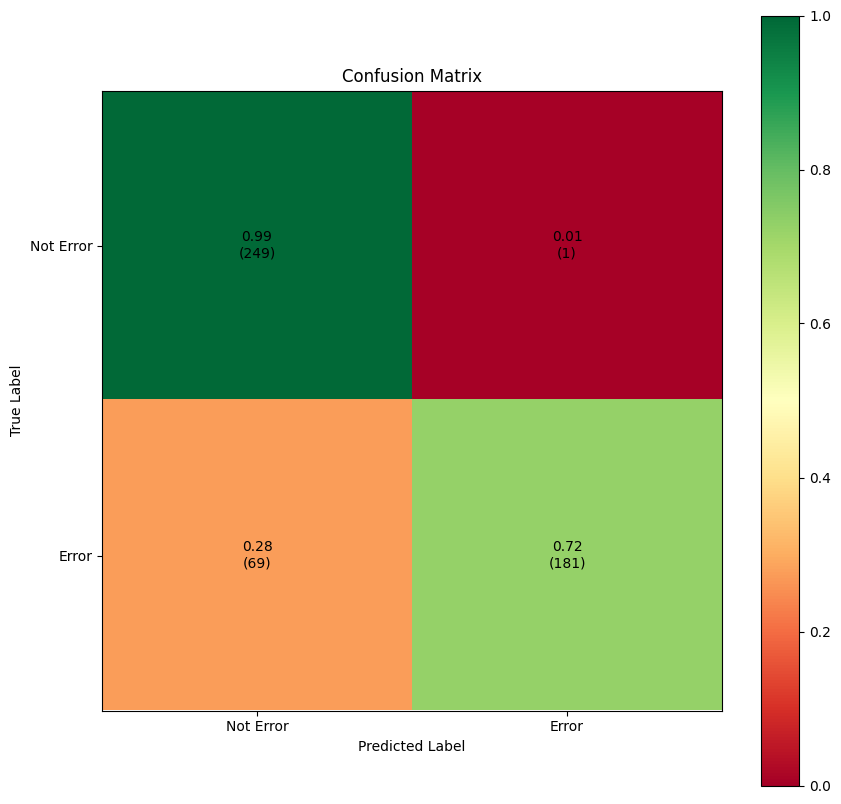

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_df["is_error"], output_df["is_error"], normalize="true")

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()

# Add labels and title
classes = ['Not Error', 'Error']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix[i, j]:.2f}\n({conf_matrix[i, j] * (len(test_df)/2):.0f})",
                 ha='center', va='center', color='black', fontsize=10)

plt.show()


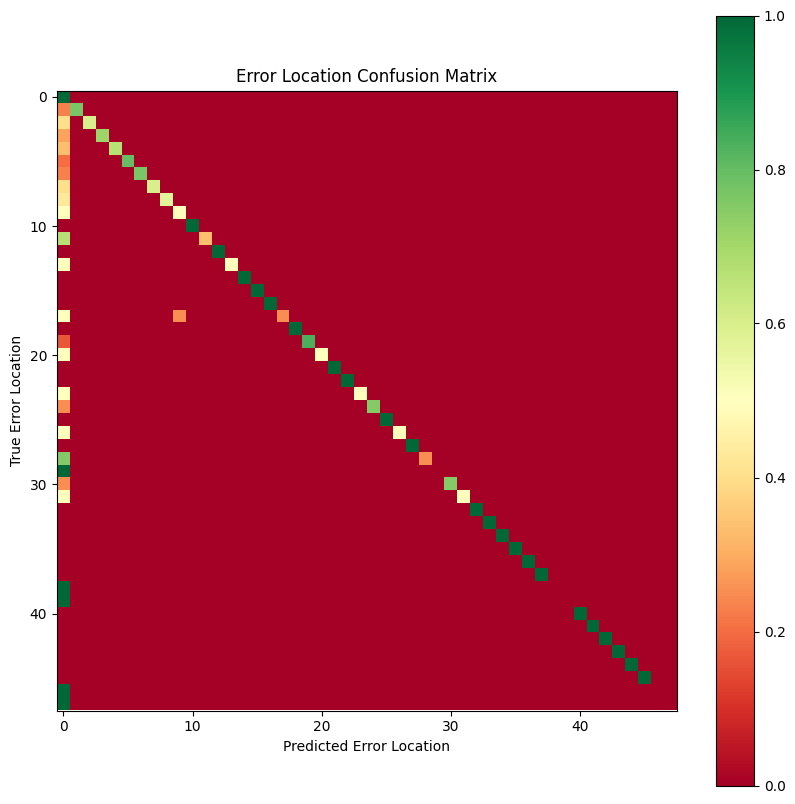

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming test_df and output_df are DataFrames with the "is_error" column
conf_matrix = confusion_matrix(test_error_idx, output_error_idx, normalize="true")

ticks = ["No Error" if i==0 else str(i) for i in output_error_idx]
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar()
plt.ylabel('True Error Location')
plt.xlabel('Predicted Error Location')
plt.title('Error Location Confusion Matrix')

plt.show()

# Conclusions

All of the models are good at avoiding false positives. However, in terms of run time and accuracy in detecting errors, bert-base-uncased was by far the best.